In [1]:
import requests

res = requests.post("http://localhost:8080/predictions/mnist/1.0", files={'data': open('/home/ubuntu/assignment08/lightning-hydra-template/Images/1000_truck.png', 'rb')})

res.json()

{'truck': 0.9999788999557495,
 'ship': 1.2545265235530678e-05,
 'car': 8.19548949948512e-06,
 'frog': 1.44850943684105e-07,
 'cat': 7.806822566180927e-08}

In [2]:
res = requests.post("http://localhost:8080/predictions/mnist/1.0", files={'data': open('/home/ubuntu/assignment08/lightning-hydra-template/Images/1000_truck.png', 'rb')})

ig = res.json()

In [3]:
import torch
import numpy as np
import torchvision.transforms as T

from PIL import Image

from captum.attr import visualization as viz

In [4]:
img_path = "/home/ubuntu/assignment08/lightning-hydra-template/Images/1000_truck.png"

inp_image = Image.open(img_path)
to_tensor = T.Compose([
	T.Resize((32, 32)),
	T.ToTensor()
])
inp_image = to_tensor(inp_image)

inp_image = inp_image.numpy()
attributions = np.array(ig)

attributions = inp_image.transpose(1, 2, 0)


In [5]:
type(np.array(ig)), ig, list(ig), np.array(list(ig))

(numpy.ndarray,
 {'truck': 0.9999788999557495,
  'ship': 1.2545265235530678e-05,
  'car': 8.19548949948512e-06,
  'frog': 1.44850943684105e-07,
  'cat': 7.806822566180927e-08},
 ['truck', 'ship', 'car', 'frog', 'cat'],
 array(['truck', 'ship', 'car', 'frog', 'cat'], dtype='<U5'))

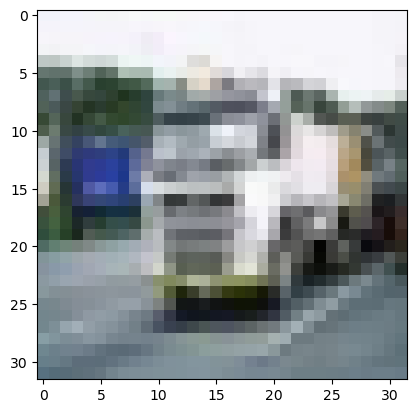

In [6]:
import matplotlib.pyplot as plt

plt.imshow(attributions, cmap="inferno")

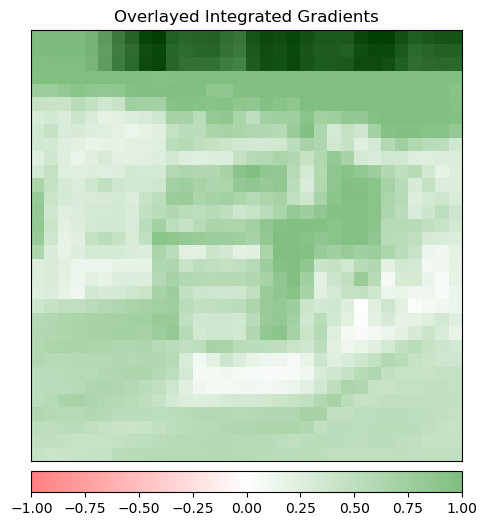

(<Figure size 600x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Overlayed Integrated Gradients'}>)

In [7]:
viz.visualize_image_attr(attributions, inp_image, method="blended_heat_map",sign="all", show_colorbar=True, title="Overlayed Integrated Gradients")